<a href="https://colab.research.google.com/github/emmad225/BIACoursework/blob/main/duffyep_lab6_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CSCI 3397/PSYC 3317] Lab 6: Linear Classification in PyTorch

**Posted:** Wednesday, March 13, 2023

**Due:** Wednesday, March 20, 2023

__Total Points__: 4 pts

__Submission__: please rename the .ipynb file as __\<your_username\>\_lab6b.ipynb__ before you submit it to canvas. Example: weidf_lab6.ipynb.

# <b>1. Optimization Basics</b>


Let's implement the gradient descend method to find the minimum value for the function $g(x) = 0.066x^4-0.32x^3-0.85x^2+ 4.2x+8.2$.

initial result: x=5.50, g(x)=12.74
final result: x=4.27, g(x)=7.66


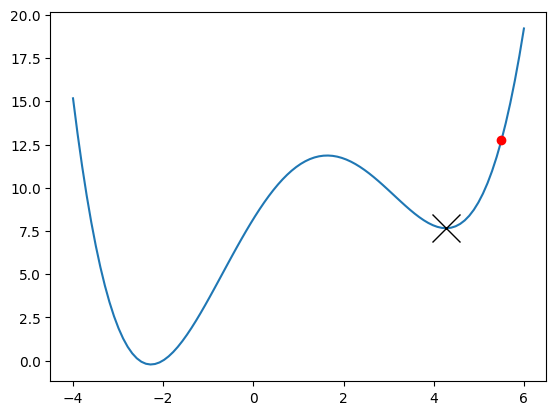

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## function definition
def g(x):
    # return the value of the defined g(x) at value x
    return 8.2 + 4.2*x**1 -0.85*x**2 -0.32*x**3+ 0.066*x**4

def Dg(x):
    # return the value of the gradient of the defined g(x) at value x
    return 4.2 -1.7*x -0.96*x**2+ 0.264*x**3

## gradient descent
def optimizer_grad_descent(x0, grad, alpha = 0.1, num_step = 100, x_ran=None):
    for x in range(num_step):
        # gradient descent update
        x0 = x0 - alpha * grad(x0)
        if x_ran is not None:
          # clip the value
          x0 = np.clip(x0, x_ran[0], x_ran[1])
    return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x1 = optimizer_grad_descent(x0, Dg, alpha = 0.1, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x1,g(x1), 'kx', markersize=20)
plt.show()

# <b>2. PyTorch Basics<b>

We will explain how to implement machine learning building blocks (model, loss, and optimization) in PyTorch.

## What is PyTorch?
1. A Python GPU-accelerated tensor library (NumPy, but faster)
2. Differentiable Programming with dynamic computation graphs
3. Flexible and efficient **neural network** library
4. Python-first framework (easy to integrate with other Python libraries, debug, and extend)
  + Quick conversion from & to NumPy array, integration with other Python libs.
  + Your favorite Python debugger.
  + Adding custom ops with Python/c++ extension.
  + Running in purely c++ environment with the c++ API.

Useful links:

+ PyTorch documentation: https://pytorch.org/docs/stable/index.html
  -  Most math operations can be found as `torch.*` or `Tensor.*`.
+ [Optional] PyTorch official tutorials: https://pytorch.org/tutorials/
  - Transfer learning tutorial: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
+ [Optional] PyTorch examples: https://github.com/pytorch/examples/
  - DCGAN, ImageNet training, Reinforcement Learning, etc.

### PyTorch Installation

In [ ]:
# install torch and torchvision (a utility library for computer vision that provides many public datasets and pre-trained models)
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00


## 2.1 GPU-accelerated Tensor Library

The syntax of the torch tensor library is similar to that of numpy.

In [ ]:
import torch

In [ ]:
# Create a 3x5 matrix filled with zeros
x = torch.zeros(3, 5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
# Create a 3x5 matrix filled with random values from a standard normal distribution
y = torch.randn(3, 5)
print(y)

tensor([[ 0.7198,  1.6729, -0.5700, -0.5376, -0.1014],
        [ 2.1006,  0.9604, -1.7158,  1.0649,  0.5691],
        [ 0.2694, -0.4575,  0.4510,  0.9803,  0.2640]])


In [ ]:
# Shape manipulations
print('\n.t()  (transpose): ')
print(y.t())

print('.reshape(5, 3): ')
print(y.reshape(5, 3))


.t()  (transpose): 
tensor([[ 0.7198,  2.1006,  0.2694],
        [ 1.6729,  0.9604, -0.4575],
        [-0.5700, -1.7158,  0.4510],
        [-0.5376,  1.0649,  0.9803],
        [-0.1014,  0.5691,  0.2640]])
.reshape(5, 3): 
tensor([[ 0.7198,  1.6729, -0.5700],
        [-0.5376, -0.1014,  2.1006],
        [ 0.9604, -1.7158,  1.0649],
        [ 0.5691,  0.2694, -0.4575],
        [ 0.4510,  0.9803,  0.2640]])


In [ ]:
# Slicing
print(y[1:])

# Slicing + select every two elements
print(y[1:, ::2])

tensor([[ 2.1006,  0.9604, -1.7158,  1.0649,  0.5691],
        [ 0.2694, -0.4575,  0.4510,  0.9803,  0.2640]])
tensor([[ 2.1006, -1.7158,  0.5691],
        [ 0.2694,  0.4510,  0.2640]])


In [ ]:
# Basic arithmetics
print(x + 2)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])


In [ ]:
print(y * (x + 2))

tensor([[ 1.4397,  3.3457, -1.1400, -1.0752, -0.2027],
        [ 4.2012,  1.9209, -3.4315,  2.1299,  1.1382],
        [ 0.5388, -0.9150,  0.9020,  1.9607,  0.5280]])


In [ ]:
print((y * (x + 2)).exp())

tensor([[4.2194e+00, 2.8381e+01, 3.1982e-01, 3.4124e-01, 8.1651e-01],
        [6.6767e+01, 6.8271e+00, 3.2338e-02, 8.4138e+00, 3.1212e+00],
        [1.7140e+00, 4.0053e-01, 2.4644e+00, 7.1043e+00, 1.6956e+00]])


### GPU Acceleration (BC jupyterhub doesn't have GPU support)

Everything can be run on a GPU

First, let us create a [`torch.device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device) object representing a GPU device.

In [ ]:
cuda0 = torch.device('cuda:0')  # pick the GPU at index 0

In [ ]:
# Move a tensor from CPU to GPU
# NOTE: the first time you access a GPU, a context is created so this may take a
# few seconds. But subsequent uses will be fast.

cuda_y = y.to(cuda0)
print(cuda_y)

tensor([[ 0.7198,  1.6729, -0.5700, -0.5376, -0.1014],
        [ 2.1006,  0.9604, -1.7158,  1.0649,  0.5691],
        [ 0.2694, -0.4575,  0.4510,  0.9803,  0.2640]], device='cuda:0')


In [ ]:
# Or directly creating a tensor on GPU
cuda_x = torch.zeros(3, 5, device=cuda0)
print(cuda_x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')


In [ ]:
# All functions and methods work on GPU tensors
print((cuda_y * (cuda_x + 2)).exp())  # values match the CPU results above!

tensor([[4.2194e+00, 2.8381e+01, 3.1982e-01, 3.4124e-01, 8.1651e-01],
        [6.6767e+01, 6.8271e+00, 3.2338e-02, 8.4138e+00, 3.1212e+00],
        [1.7140e+00, 4.0053e-01, 2.4644e+00, 7.1043e+00, 1.6956e+00]],
       device='cuda:0')


### NumPy Bridge

Converting a `torch.Tensor` to a `np.ndarray` and vice versa is a breeze.

The `torch.Tensor` and `np.ndarray` will share their underlying memory locations (if the `torch.Tensor` is on CPU and `dtype` is the same), and changing one will change the other.

In [ ]:
import numpy as np

In [ ]:
# convert a torch tensor into a numpy array
x = torch.randn(5)
x_np1 = x.numpy()
x_np2 = np.asarray(x)

print(x)
print(x_np1)
print(x_np2)

tensor([-1.8572,  1.3065, -1.0273, -0.7562,  1.4059])
[-1.8572422  1.3065072 -1.0273327 -0.7562191  1.405887 ]
[-1.8572422  1.3065072 -1.0273327 -0.7562191  1.405887 ]


In [ ]:
# convert a numpy array into a torch tensor

a = np.random.randn(3, 4)
a_pt = torch.as_tensor(a)
print(a)
print(a_pt)

[[ 0.16677557 -0.10229111  0.63259144 -2.2048607 ]
 [ 0.5678323   0.3650739   1.34271664 -0.60060228]
 [ 1.15983843  1.92507041  0.79447852  0.46832978]]
tensor([[ 0.1668, -0.1023,  0.6326, -2.2049],
        [ 0.5678,  0.3651,  1.3427, -0.6006],
        [ 1.1598,  1.9251,  0.7945,  0.4683]], dtype=torch.float64)


In [ ]:
# the resulting CPU Tensor shares memory with the array!
# change the tensor array -> change the orignial numpy array
# if you want a different copy: a_pt = torch.as_tensor(a.copy())

a_pt[0] = -1
print(a)

[[-1.         -1.         -1.         -1.        ]
 [ 0.5678323   0.3650739   1.34271664 -0.60060228]
 [ 1.15983843  1.92507041  0.79447852  0.46832978]]


## 2.2 Flexible and Efficient Neural Network Library

The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) and [`torch.optim`](https://pytorch.org/docs/stable/optim.html) packages provide many efficient implementations of neural network components:
  + Affine layers and [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
  + Normalization methods
  + [Initialization schemes](https://pytorch.org/docs/stable/nn.html#torch-nn-init)
  + [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
  + [Embeddings](https://pytorch.org/docs/stable/nn.html#sparse-layers)
  + [Distributed and Multi-GPU training](https://pytorch.org/docs/stable/nn.html#dataparallel-layers-multi-gpu-distributed)
  + [Gradient-based optimizers](https://pytorch.org/docs/stable/optim.html)
  + [Learning rate schedulers](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)
  + etc.

### (a1) Model: Linear Layer

We will use the [fully connected linear layer (`nn.Linear`)](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear).
A fc layer performs an affine transform with a 2D weight parameter $\mathbf{w}$ and a 1D bias parameter $\mathbf{b}$:

$$ f(\mathbf{x}) = \mathbf{w}^\mathrm{T} \mathbf{x} + \mathbf{b}$$

In [ ]:
# all popular neural network layers
import torch.nn as nn
# handy for simple functions
import torch.nn.functional as F

In [ ]:
# input x: 1D array of size 4
# output: 1D array of size 8
fc = nn.Linear(in_features=4, out_features=8)
print(fc)

Linear(in_features=4, out_features=8, bias=True)


In [ ]:
# It has two parameters, the weight and the bias
for name, p in fc.named_parameters():
    print('param name: {}\t shape: {}'.format(name, p.shape))

param name: weight	 shape: torch.Size([8, 4])
param name: bias	 shape: torch.Size([8])


In [ ]:
fc.weight

Parameter containing:
tensor([[ 0.2407, -0.3080,  0.0740,  0.0786],
        [-0.0526,  0.4571,  0.3933, -0.1207],
        [-0.2917, -0.2508, -0.4091,  0.4380],
        [-0.0661,  0.4436, -0.3780, -0.3518],
        [ 0.2332,  0.0287,  0.1233, -0.1745],
        [-0.2985,  0.1315, -0.2820, -0.1275],
        [-0.3709,  0.1968, -0.1448,  0.2848],
        [ 0.4333, -0.0187,  0.1201,  0.1018]], requires_grad=True)

In [ ]:
# These parameters by default have `requires_grad=True`, so they will collect gradients!
print(fc.bias)

Parameter containing:
tensor([-0.4936, -0.4290, -0.4018, -0.2093, -0.3760, -0.0536, -0.2134,  0.0738],
       requires_grad=True)


### (a2) Model: Sigmoid Layer

$$ \sigma(x) = \frac{1}{1+e^{-x}}.$$

In [ ]:
# Let's construct an input tensor with 2 dimensions:
#   - batch dimensionsize: 2
#   - input size: 4
x = torch.randn(2, 4)

result_linear = fc(x)
result_logistic = F.sigmoid(result_linear)
print("linear layer output: range=[-\infty, \infty]")
print(result_linear)
print("logistic output: range=[0, 1]")
print(result_logistic)


linear layer output: range=[-\infty, \infty]
tensor([[-0.4146,  0.2187, -1.6846, -0.1057,  0.1585, -0.3716, -0.9661,  0.3681],
        [-0.3781,  0.0576, -1.5710,  0.0864,  0.1829, -0.3845, -0.9686,  0.5688]],
       grad_fn=<AddmmBackward0>)
logistic output: range=[0, 1]
tensor([[0.3978, 0.5545, 0.1565, 0.4736, 0.5395, 0.4081, 0.2757, 0.5910],
        [0.4066, 0.5144, 0.1721, 0.5216, 0.5456, 0.4050, 0.2752, 0.6385]],
       grad_fn=<SigmoidBackward0>)


### (b) Loss: Cross entropy and MSE Loss Function

[Documentation](https://pytorch.org/docs/stable/nn.functional.html)

In [ ]:
# generate arbitrary classification label
target = result_linear>0.1
target = target.to(torch.float) # need to convert it to float

# Let's try MSE loss
loss_mse = F.mse_loss(result_logistic, target)
loss_bce = F.binary_cross_entropy(result_logistic, target)
print(loss_mse, loss_bce)

tensor(0.1585, grad_fn=<MseLossBackward0>) tensor(0.4978, grad_fn=<BinaryCrossEntropyBackward0>)


### (c) Autograd and Optimizer

#### Gradient Computation
PyTorch keeps track of your computations and the gradient is automatically computed!

In [ ]:
# Compute gradients
loss_mse.backward()
print(fc.bias.grad)

tensor([ 0.0242,  0.0023,  0.0056,  0.0310, -0.0284,  0.0245,  0.0137, -0.0228])


#### Optimizer

We can code up a naive optimizer with manual gradient updates like before.

In [ ]:
# We can manually perform GD via a loop
print('bias before GD', fc.bias)
lr = 0.5
with torch.no_grad():
    # this context manager tells PyTorch that we don't want ops inside to be
    # tracked by autograd!
    # o/w PyTorch will try to automatically compute the gradient of this gradient operation too.
    for p in fc.parameters():
        p -= lr * p.grad

print('bias after one-step GD', fc.bias)

bias before GD Parameter containing:
tensor([-0.4936, -0.4290, -0.4018, -0.2093, -0.3760, -0.0536, -0.2134,  0.0738],
       requires_grad=True)
bias after one-step GD Parameter containing:
tensor([-0.5057, -0.4302, -0.4047, -0.2248, -0.3618, -0.0659, -0.2202,  0.0852],
       requires_grad=True)


More easily, we can use the provided [`torch.optim`](https://pytorch.org/docs/stable/optim.html#torch.optim) optimizers (e.g. GD+momentum and many advanced optimizers). We will see how to use the [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) optimizer in a second!

# <b>3. Logistic Regression in PyTorch</b>

## 3.1 Data
- download and pre-procoss the dataset (x,y)
- divide them into train, val, and test sets in a 6:2:2 ratio
- convert from numpy to pytorch tensor

In [ ]:
# download data
import numpy as np
import pandas as pd
import torch

url = 'https://raw.githubusercontent.com/BlohmLab/MLtutorials/week3/data/marks.txt'
data = pd.read_csv(url, header=None)
Y = np.array(data.iloc[:,-1]).astype(np.float32).reshape([-1,1])

# by default, numpy arrays are float64, but pytorch tensor wants float32
X = np.array(data.iloc[:,:-1]).astype(np.float32)
# normalize the data for better learning
X = (X-X.mean(axis=0))/X.std(axis=0)

def data_split(N, ratio=[6,2,2]):
    # generate a shuffle array
    shuffle_idx = np.arange(N)
    np.random.shuffle(shuffle_idx)
    # divide into train-val-test by the ratio
    data_split = (np.cumsum(ratio)/float(sum(ratio))*N).astype(int)
    out_idx = [None] * len(ratio)
    out_idx[0] = shuffle_idx[:data_split[0]]
    for i in range(1,len(ratio)):
        out_idx[i] = shuffle_idx[data_split[i-1] : data_split[i]]
    return out_idx

train_idx, val_idx, test_idx = data_split(len(Y))

X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

#### TODO: convert variables into pytorch tensors
X_train_pt, Y_train_pt = torch.as_tensor(X_train), torch.as_tensor(Y_train)
X_val_pt, Y_val_pt = torch.as_tensor(X_val), torch.as_tensor(Y_val)
X_test_pt, Y_test_pt = torch.as_tensor(X_test), torch.as_tensor(Y_test)
print(X_train_pt.size())

torch.Size([60, 2])


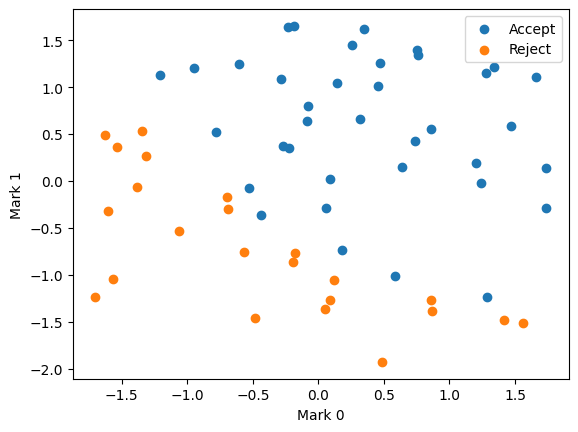

In [ ]:
def plot_logistic_regression(fig, param_W=None, param_b=None, x=X, y=Y, subp=111, title='train'):
    # plot original data
    X_admitted = x[y==1,:]
    X_rejected = x[y==0,:]

    ax = fig.add_subplot(subp)
    ax.scatter(X_admitted[:,0],X_admitted[:,1])
    ax.scatter(X_rejected[:,0],X_rejected[:,1])
    ax.set_xlabel('Mark 0')
    ax.set_ylabel('Mark 1')
    ax.legend(('Accept','Reject'))

    if param_W is not None:
        # plot the decision boundary
        xx = np.linspace(-2, 2,100)
        yy = -param_W[0]/param_W[1]*xx - param_b/param_W[1]
        ax.plot(xx,yy,'g-')
        plt.title(title)

fig = plt.figure()
plot_logistic_regression(fig, None, None, X_train, Y_train[:,0], 111, 'train data')
plt.show()

## 3.2 Logistic Regression Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        # define the layers and parameters
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # this function will be called to process the input data
        outputs = F.sigmoid(self.linear(x))
        return outputs

# create a model (parameters are initialized)
# input (size = 2): two exam scores (the bias param will take care of constant term)
# ouput (size = 1): accept or not
model = LogisticRegression(input_dim = 2, output_dim = 1)

# upload the model to GPU
# model.cuda()

## 3.3 Optimizer
We will use all the data and SGD becomes the same as the gradient descent (GD).

In [ ]:
lr_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

## 3.4 Training
Well, only 4 important lines!

In [ ]:
num_iter = 150
# training loop
for ii in range(num_iter):
    # 1. forward pass
    Y_hat = model(X_train_pt)

    # 2. compute loss
    loss = F.mse_loss(Y_hat, Y_train_pt)

    # 3. compute gradients
    loss.backward()

    # 4. gradient update
    optimizer.step()

    # add some printing
    if ii % 10 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))

# if the torch tensor has "require_grad", need to detach it first
ww = model.linear.weight.detach().numpy()[0]
bb = model.linear.bias.detach().numpy()[0]

iteration 0	loss 0.18662
iteration 10	loss 0.17530
iteration 20	loss 0.14914
iteration 30	loss 0.12038
iteration 40	loss 0.09796
iteration 50	loss 0.08333
iteration 60	loss 0.07435
iteration 70	loss 0.06883
iteration 80	loss 0.06529
iteration 90	loss 0.06288
iteration 100	loss 0.06108
iteration 110	loss 0.05965
iteration 120	loss 0.05842
iteration 130	loss 0.05735
iteration 140	loss 0.05639


## 3.5 Evaluation
We will first compute the accuray and plot the predicted decision boundary. Note that the model that fits the training data well, may still have much error on the val and test data.

In [ ]:
def compute_accuracy(model, x=X, y=Y):
    """function that compares predicted y to true y and returns accuracy"""
    y_pred = model(x)>0.5
    accuracy = (y_pred == y).sum()/len(y)
    return accuracy

print('Train acc:', compute_accuracy(model, X_train_pt, Y_train_pt))
print('Val acc:', compute_accuracy(model, X_val_pt, Y_test_pt))
print('Test acc:', compute_accuracy(model, X_test_pt, Y_test_pt))

Train acc: tensor(0.9000)
Val acc: tensor(0.5500)
Test acc: tensor(0.8500)


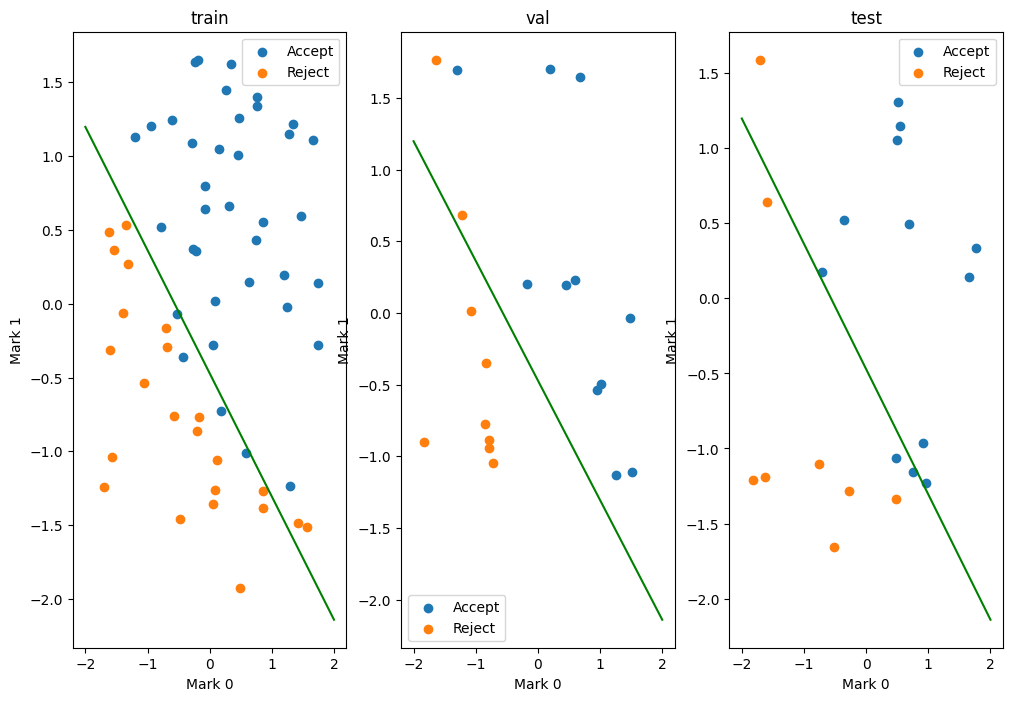

In [ ]:
fig = plt.figure(figsize=(12, 8))
plot_logistic_regression(fig, ww, bb, X_train, Y_train[:,0], 131, 'train')
plot_logistic_regression(fig, ww, bb, X_val, Y_val[:,0], 132, 'val')
plot_logistic_regression(fig, ww, bb, X_test, Y_test[:,0], 133, 'test')
plt.show()



# (4 pts) Exercise
Let's implement a better optimization method: "gradient descend with momentum" method described in [distill.pub paper](https://distill.pub/2017/momentum/).
The high-level idea is that instead of trusting the current gradient 100%, we can linearly combine the previous gradients (i.e., carry on the momemtum) and the current gradient. With this, it can stabilize the search moves (e.g., not affected by noisy local gradient) and get out of stuck of the local optima where the current graident is 0.

Here's the new Update formula:
- $z^{k+1}=\beta z^{k}+ \dfrac{dg}{dx}(x^{k})$
- $x^{k+1}=x^{k+1} -\alpha z^{k+1}$

Note that, if $\beta=0$, the update rule is the same as the gradient descent method.

Let's implement it and find the global mimina for this function.

initial result: x=5.50, g(x)=12.74
final result: x=-2.40, g(x)=-0.16


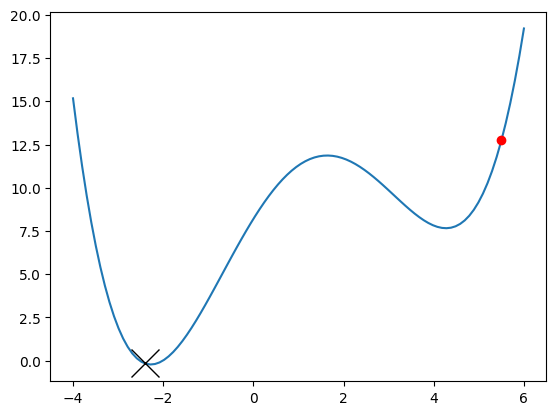

In [ ]:
## gradient descent with momemtum
def optimizer_grad_descent_momentum(x0, grad, alpha = 0.1, beta = 0.99, num_step = 100, x_ran=None):
    v0 = 0
    for x in range(num_step):
        # gradient descend with momentum update

        ### Your code starts here
        v1 = beta * v0 + grad(x0)
        x0 = x0 - alpha * v1
        v0 = v1

        ### Your code ends here
        if x_ran is not None:
            # clip the value
            x0 = np.clip(x0, x_ran[0], x_ran[1])
    return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x2 = optimizer_grad_descent_momentum(x0, Dg, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x2, g(x2)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x2,g(x2), 'kx', markersize=20)
plt.show()